In [102]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Data from File

In [132]:
books_rating=pd.read_csv('/Users/prajwala/Downloads/Books_rating.csv')
books_data=pd.read_csv('/Users/prajwala/Downloads/books_data.csv')

In [133]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [134]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


### Data Pre-processing

In [135]:
books=pd.merge(books_rating, books_data, on = 'Title')

In [136]:
books.shape

(3000000, 19)

#### extracting useful columns

In [137]:
data = books[['Title','review/score','review/text','authors','categories','ratingsCount']]

In [138]:
data.drop_duplicates(inplace = True)

In [139]:
data.shape

(2617289, 6)

In [140]:
data.isnull().sum()

Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
dtype: int64

In [141]:
data.dropna(inplace = True)

In [142]:
data.isnull().sum()

Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


In [144]:
data.columns

Index(['Title', 'review/score', 'review/text', 'authors', 'categories',
       'ratingsCount'],
      dtype='object')

In [145]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount
47,The Church of Christ: A Biblical Ecclesiology ...,5.0,With the publication of Everett Ferguson's boo...,['Everett Ferguson'],['Religion'],5.0
48,The Church of Christ: A Biblical Ecclesiology ...,5.0,Everett Ferguson approaches the subject of ear...,['Everett Ferguson'],['Religion'],5.0
49,The Church of Christ: A Biblical Ecclesiology ...,4.0,This book is a continual resource. It is so bi...,['Everett Ferguson'],['Religion'],5.0
50,The Church of Christ: A Biblical Ecclesiology ...,4.0,This is a very useful and thorough text book. ...,['Everett Ferguson'],['Religion'],5.0
181,Voices from the Farm: Adventures in Community ...,5.0,"Ironically, I grew up in a small town close to...",['Rupert Fike'],['Biography & Autobiography'],1.0


### removing "[]" & "' '" from authors and categories

In [146]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount
47,The Church of Christ: A Biblical Ecclesiology ...,5.0,With the publication of Everett Ferguson's boo...,['Everett Ferguson'],['Religion'],5.0
48,The Church of Christ: A Biblical Ecclesiology ...,5.0,Everett Ferguson approaches the subject of ear...,['Everett Ferguson'],['Religion'],5.0
49,The Church of Christ: A Biblical Ecclesiology ...,4.0,This book is a continual resource. It is so bi...,['Everett Ferguson'],['Religion'],5.0
50,The Church of Christ: A Biblical Ecclesiology ...,4.0,This is a very useful and thorough text book. ...,['Everett Ferguson'],['Religion'],5.0
181,Voices from the Farm: Adventures in Community ...,5.0,"Ironically, I grew up in a small town close to...",['Rupert Fike'],['Biography & Autobiography'],1.0


In [148]:
data.shape

(1325891, 6)

In [150]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount
47,The Church of Christ: A Biblical Ecclesiology ...,5.0,With the publication of Everett Ferguson's boo...,Everett Ferguson,['Religion'],5.0
48,The Church of Christ: A Biblical Ecclesiology ...,5.0,Everett Ferguson approaches the subject of ear...,Everett Ferguson,['Religion'],5.0
49,The Church of Christ: A Biblical Ecclesiology ...,4.0,This book is a continual resource. It is so bi...,Everett Ferguson,['Religion'],5.0
50,The Church of Christ: A Biblical Ecclesiology ...,4.0,This is a very useful and thorough text book. ...,Everett Ferguson,['Religion'],5.0
181,Voices from the Farm: Adventures in Community ...,5.0,"Ironically, I grew up in a small town close to...",Rupert Fike,['Biography & Autobiography'],1.0


In [151]:
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount
47,The Church of Christ: A Biblical Ecclesiology ...,5.0,With the publication of Everett Ferguson's boo...,Everett Ferguson,Religion,5.0
48,The Church of Christ: A Biblical Ecclesiology ...,5.0,Everett Ferguson approaches the subject of ear...,Everett Ferguson,Religion,5.0
49,The Church of Christ: A Biblical Ecclesiology ...,4.0,This book is a continual resource. It is so bi...,Everett Ferguson,Religion,5.0
50,The Church of Christ: A Biblical Ecclesiology ...,4.0,This is a very useful and thorough text book. ...,Everett Ferguson,Religion,5.0
181,Voices from the Farm: Adventures in Community ...,5.0,"Ironically, I grew up in a small town close to...",Rupert Fike,Biography & Autobiography,1.0


In [152]:
data=data.sample(25000)
data.shape

(25000, 6)

### new coloumn for word count of each review

In [153]:
data['word_count'] = data['review/text'].apply(lambda  x: len(x.split(' ')))

In [ ]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
331132,The Five Love Languages: The Secret to Love th...,5.0,"This is a great book for everyone - married, d...",Gary Chapman,Family & Relationships,195.0,29
555821,Memoirs of a Geisha (Signed),5.0,Never in my life has a book creeped into my ev...,Arthur Golden,Fiction,1631.0,140
1589763,Yellow Eyes,5.0,I read this book when I was in elementary scho...,Katherine Pancol,Fiction,11.0,83
1709130,Until...,5.0,I eagerly waited for Until... and Timmothy McC...,Lori Roy,Fiction,15.0,165
1921593,The Heart of the Matter (Home Repair Is Homici...,5.0,Henry Scobie is a man whose life has been marr...,Sarah Graves,Fiction,8.0,152


### Distribution of Books based on Genre

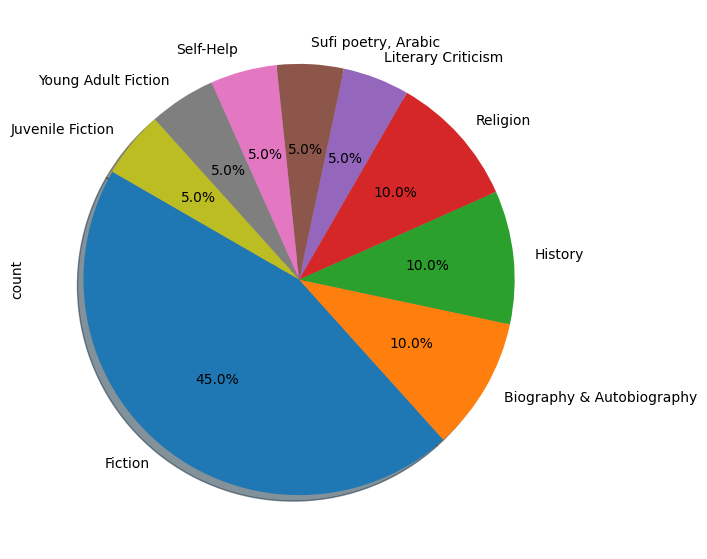

In [154]:
category_counts = (data.head(20))['categories'].value_counts()
plt.figure(figsize = (7,7))
category_counts.plot.pie(autopct='%1.1f%%', startangle=150, labels = category_counts.index, shadow= True)
plt.show()

### Most frequent words in over 3 rated reviews


In [155]:
from wordcloud import WordCloud

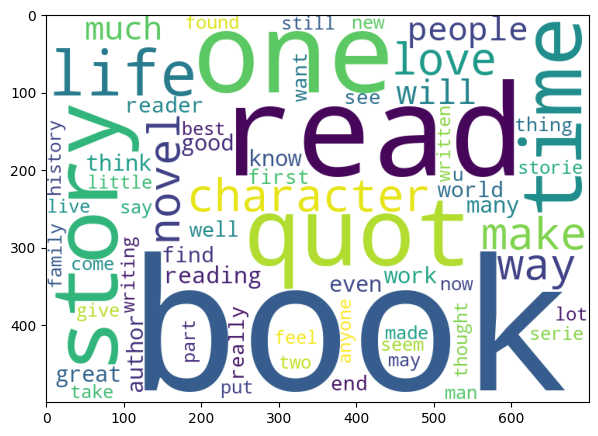

In [156]:
wc= WordCloud(width=700,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))
plt.figure(figsize=(7,7))
plt.imshow(spam_wc)

## Sentiment Analysis using VADER


In [157]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [158]:
data['clean_reviews'] = data['review/text'].str.lower()
data['score'] = data['clean_reviews'].apply(lambda review: analyzer.polarity_scores(review))
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [159]:
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment
732997,The Adventures of Tom Sawyer (Courage Literary...,5.0,&quot;The Adventures of Tom Sawyer&quot; is a ...,Mark Twain,Literary Criticism,3413.0,630,&quot;the adventures of tom sawyer&quot; is a ...,"{'neg': 0.137, 'neu': 0.769, 'pos': 0.094, 'co...",-0.9898,negative
238005,Harriet Tubman: The Life and the Life Stories ...,5.0,Harriet Tubman: The Life And The Life Stories ...,Jean M. Humez,Biography & Autobiography,2.0,148,harriet tubman: the life and the life stories ...,"{'neg': 0.041, 'neu': 0.818, 'pos': 0.141, 'co...",0.9582,positive
787403,Violets Are Blue (Read by Daniel Whitner & Kev...,3.0,I must begin my comments by suggesting Alex Cr...,James Patterson,Fiction,27.0,162,i must begin my comments by suggesting alex cr...,"{'neg': 0.017, 'neu': 0.92, 'pos': 0.063, 'com...",0.6900,positive
1044491,Open Secret: Versions of Rumi,5.0,Absolutely beautiful. Along with Kenneth Rexro...,"Jalal al-Din Rumi (Maulana)', 'Jalāl al-Dīn Rū...","Sufi poetry, Arabic",1.0,18,absolutely beautiful. along with kenneth rexro...,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.8016,positive
2039333,The Faded Sun Trilogy,5.0,Don't make the mistake that I did-- Cherryh's ...,C. J. Cherryh,Fiction,1.0,190,don't make the mistake that i did-- cherryh's ...,"{'neg': 0.072, 'neu': 0.862, 'pos': 0.065, 'co...",-0.1155,negative


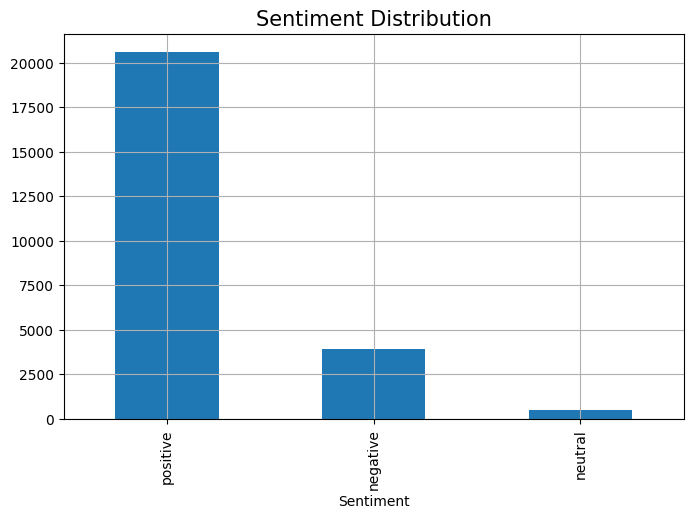

In [160]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Sentiment Distribution')

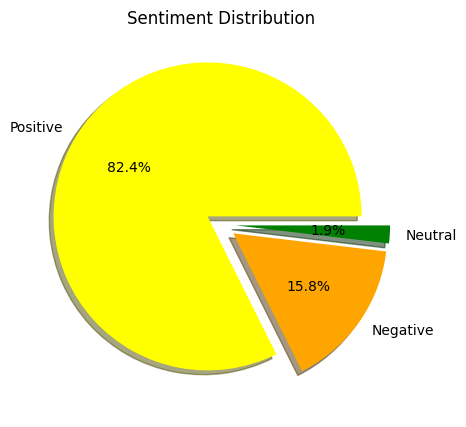

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['yellow', 'orange', 'green']


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')